# Lab 07

# MNIST Dataset
MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and
employees of the US Census Bureau. Each image is labeled with the digit it represents. The following
code fetches the MNIST dataset.


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import multilabel_confusion_matrix, classification_report,confusion_matrix
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


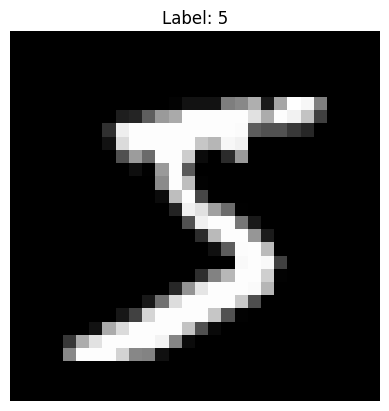

'\n# Flatten the images (28x28 → 784)\nX_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 784)\nX_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 784)\n\n# Combine images and labels\ntrain_data = pd.DataFrame(X_train)\ntrain_data.insert(0, "label", y_train)  # Insert labels as the first column\n\ntest_data = pd.DataFrame(X_test)\ntest_data.insert(0, "label", y_test)\n\n# Save as CSV files\ntrain_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_train.csv", index=False)\ntest_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_test.csv", index=False)\n\nprint("MNIST dataset saved as CSV files: mnist_train.csv and mnist_test.csv")\n\n'

In [ ]:
# Don't run this cell
# downloading MNIST
import tensorflow as tf
import pandas as pd

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

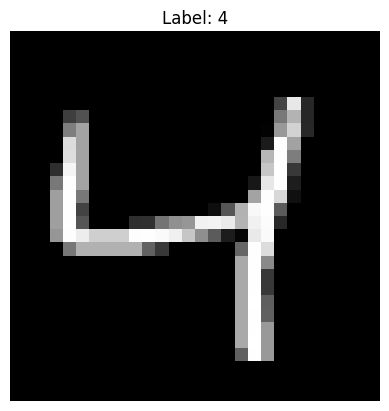

'\n# Flatten the images (28x28 → 784)\nX_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 784)\nX_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 784)\n\n# Combine images and labels\ntrain_data = pd.DataFrame(X_train)\ntrain_data.insert(0, "label", y_train)  # Insert labels as the first column\n\ntest_data = pd.DataFrame(X_test)\ntest_data.insert(0, "label", y_test)\n\n# Save as CSV files\ntrain_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_train.csv", index=False)\ntest_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_test.csv", index=False)\n\nprint("MNIST dataset saved as CSV files: mnist_train.csv and mnist_test.csv")\n\n'

In [ ]:
# Display the first image
index=2
plt.imshow(X_train[index], cmap="gray")  # Use cmap="gray" for proper grayscale display
plt.title(f"Label: {y_train[index]}")  # Display the label as the title
plt.axis("off")  # Remove axis for clarity
plt.show()

# Flatten the images (28x28 → 784)
X_train = X_train.reshape(X_train.shape[0], -1)  # (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)     # (10000, 784)

# Combine images and labels
train_data = pd.DataFrame(X_train)
train_data.insert(0, "label", y_train)  # Insert labels as the first column

test_data = pd.DataFrame(X_test)
test_data.insert(0, "label", y_test)

# Save as CSV files
train_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_train.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/MLPractical/mnist_test.csv", index=False)

print("MNIST dataset saved as CSV files: mnist_train.csv and mnist_test.csv")


In [ ]:
# downaloding MNIST as a flattened image
mnist = fetch_openml('mnist_784', version=1) # ,as_frame=False
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per feature
* A target key containing an array with the labels


In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.shape


(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Take a peek at
one digit from the dataset. All required is to grab an instance’s feature vector, reshape it to a 28×28
array, and display it using Matplotlib’s imshow() function using the following code.


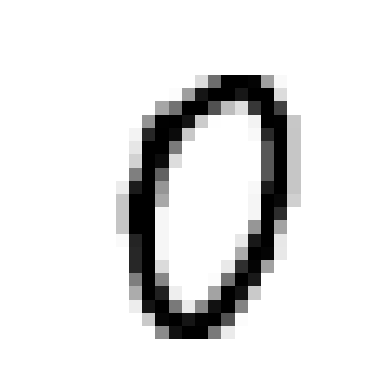

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
some_digit = X.iloc[1000] # change index number from 0 to 69999
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

This looks like a 0, and indeed that’s what the label tells

In [ ]:
y[1000]


'0'

A test set is required to be created before inspecting the data closely. The MNIST dataset is actually
already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# 1. Multiclass Classification

## Steps:
1. Implement 10 different binary classifiers (0- detector, 1- detector ,..., 9-detector)
2. Train & test all the models.
3. To predict class of a new image, pass image to all the ten detectors and obatin decision score
4. Classifier with highest score is the class of the test image.


In [ ]:
# Do it yourself.

# 2. Multilabel Classification
Follwing code has two possible output labels.
1. Output label 1, if the number(0-9) is odd
2. Output label 2, if the number(0-9) is above 7

### Caution
Use a classifier that is capable of doing multilabel classification (e.g. KNeighbourClassification)

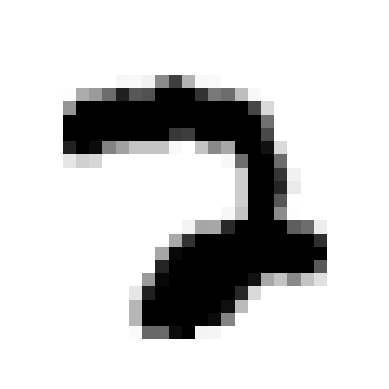

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


CPU times: user 459 ms, sys: 194 ms, total: 653 ms
Wall time: 659 ms


array([[ True,  True]])

In [ ]:
%%time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train.astype(float) >= 7)
#print(y_train_large)
y_train_odd = (y_train.astype(float) % 2 == 1)
# Following line combines the two binary arrays (y_train_large and y_train_odd) horizontally
# into a single array using numpy's c_ function. This forms a multi-label
# dataset where each sample can belong to multiple classes
#(in this case, "large" and "odd").
y_multilabel = np.c_[y_train_large, y_train_odd]
# print(y_multilabel)
y_test_large = (y_test.astype(float) >= 7)
y_test_odd = (y_test.astype(float) % 2 == 1)
y_multilabel_test = np.c_[y_test_large, y_test_odd]
#print(y_multilabel_test)

model1 = KNeighborsClassifier()
model1.fit(X_train, y_multilabel)
#some_digit = X.iloc[1000] # change index number from 0 to 69999
#some_digit = X.iloc[50] # 3 is at index 50
some_digit = X.iloc[120] # 7 is at index 120
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()
model1.predict([some_digit])

In [ ]:
%%time
Y_pred=model1.predict(X_test)
#print(Y_pred)

CPU times: user 1min 6s, sys: 4.54 s, total: 1min 10s
Wall time: 48.3 s


### Performance Metrics

In [ ]:
# confusion matrix
mcm = multilabel_confusion_matrix(y_multilabel_test, Y_pred)
# Iterate over each label
for i in range(len(mcm)):
    tn, fp, fn, tp = mcm[i].ravel()
    print(f"Label {i+1}:")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")

#classification report
target_names = ['large label', 'odd label']
print(classification_report(y_multilabel_test, Y_pred,target_names=target_names))

# Model Accuracy
print("The accuracy is "+str(metrics.accuracy_score(y_multilabel_test,Y_pred)*100)+"%")

Label 1:
True Positives: 2905
False Positives: 72
True Negatives: 6917
False Negatives: 106
Label 2:
True Positives: 5027
False Positives: 101
True Negatives: 4825
False Negatives: 47
              precision    recall  f1-score   support

 large label       0.98      0.96      0.97      3011
   odd label       0.98      0.99      0.99      5074

   micro avg       0.98      0.98      0.98      8085
   macro avg       0.98      0.98      0.98      8085
weighted avg       0.98      0.98      0.98      8085
 samples avg       0.59      0.59      0.59      8085

The accuracy is 97.66%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task:
Compare and comment on precision, recall, f1-score, support for both labels

# 3. Multioutput Classification


## Task
1. Download MNIST as a CSV file (use code given in next cell)[ Note: target appears as first cvolumn ]
2. Modify file to inlcude 3 classes only (say 4, 5, 8)
3. Move target column at the end.
4. Separate input featrues  and target
5. Add any two output lables of your choice (say 1. no. is even, 2. no. >5)
6. Perform train test split
7. Train and evaluate model using some multilabel classifier
8. Analyze performance and metrics and share your observation


In [ ]:
# MNIST dataset is already downloded as mnist

import pandas as pd
# Convert to DataFrame
data = pd.DataFrame(mnist.data)
data.insert(0, "label", mnist.target)  # Insert labels as first column
# Save to CSV
data.to_csv("/content/drive/MyDrive/MLPractical/mnist.csv", index=False)
print("MNIST dataset saved as mnist.csv")

MNIST dataset saved as mnist.csv
